In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Vattenbalans Sverige
Man kan försöka undersöka vattenbalansen i Sverige (under ett rimligt tidsintervall) genom att hitta funktioner (m.h.a. minsta kvadratmetoden) för vattenuttag och vattentillgång, och sedan göra en for-loop som använder sig av ekvationen nedan (WEI+ är ett index på vattenbrist: värden över 20% = vattenbrist). (Problem att vi mäter WEI och inte WEI+)

$WEI = \frac{Vattenuttag}{Förnybart vatten}$

ekvationen: https://www.smhi.se/polopoly_fs/1.152541!/Hydrologi_120.pdf

### Vattenuttag kod och graf 

In [4]:
data = pd.read_csv("water-withdrawals-per-capita.csv", sep = ',')


vatten_uttag = data['water_withdrawal'].tolist()
x_ar = data['Year'].tolist()


In [21]:
fit_coeffs = np.polyfit( x_ar , vatten_uttag , 4) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
x_1 = np.linspace(1970,2011, 41)
funklist = np.polyval(fit_coeffs, x_1)
fit_coeffs = np.polyfit( x_data , y_data , 4) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
a = fit_coeffs [4]
b = fit_coeffs [3]
c = fit_coeffs [2]
d = fit_coeffs [1]
e = fit_coeffs [0]

print(f'a = {a}, b = {b}, c = {c}, d = {d}, e = {e}')


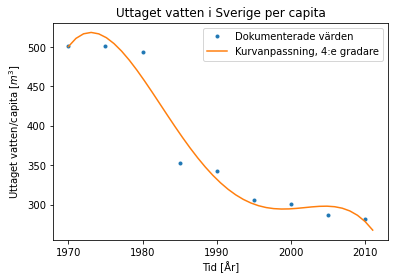

In [42]:
plt.plot(x_ar, vatten_uttag, '.', label="Dokumenterade värden")
plt.plot(x_1, funklist,label="Kurvanpassning, 4:e gradare")
plt.title('Uttaget vatten i Sverige per capita')
plt.ylabel("Uttaget vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

### Förnybara vattenresurser kod och graf

In [23]:
ddata = pd.read_csv("renewable-water-resources-per-capita.csv", sep=",")


vatten_tillgang = ddata['Renewable_freshwater'].tolist()
x_ar2 = ddata['Year'].tolist()

 
x_2 = np.linspace(1962, 2015, 53)
curvefit_2 = np.polyfit(x_ar2, vatten_tillgang, 4)
funklist_2 = np.polyval(curvefit_2, x_2)    



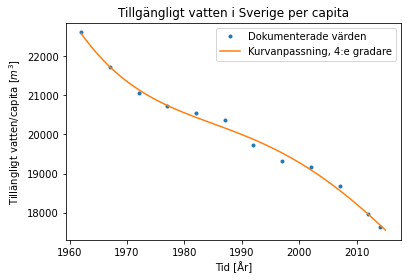

In [43]:
plt.plot(x_ar2, vatten_tillgang, ".", label="Dokumenterade värden")
plt.plot(x_2, funklist_2,label="Kurvanpassning, 4:e gradare" )
plt.title('Tillgängligt vatten i Sverige per capita')
plt.ylabel("Tillängligt vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

## WEI-index

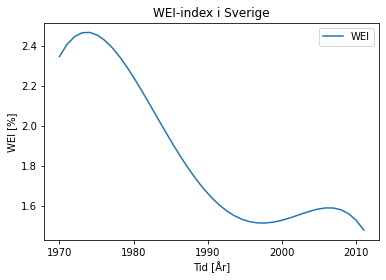

In [44]:
wei= funklist/funklist_2[8:-4]
weiprocent= wei*100
plt.title('WEI-index i Sverige')
plt.plot(x_1, weiprocent, label="WEI")
plt.ylabel("WEI [%]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()


## Vattenbalans i Libyen

## Vattenuttag kod och graf

In [26]:
data_l = pd.read_csv("water-withdrawals-per-capita_libya.csv", sep = ',')

vatten_uttag_l = data_l['water_withdrawal'].tolist()
x_ar_l = data_l['Year'].tolist()


In [33]:
fit_coeffs_l = np.polyfit( x_ar_l , vatten_uttag_l , 4) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
x_1_l = np.linspace(x_ar_l[0],x_ar_l[-1],x_ar_l[-1]- x_ar_l[0])
funklist_l = np.polyval(fit_coeffs_l, x_1_l)

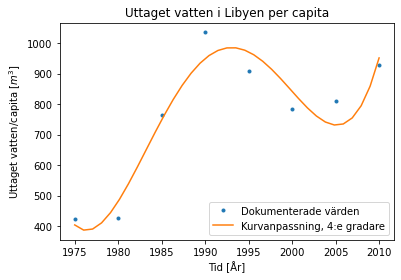

In [45]:
plt.plot(x_ar_l, vatten_uttag_l, '.', label="Dokumenterade värden")
plt.plot(x_1_l, funklist_l,label="Kurvanpassning, 4:e gradare")
plt.title('Uttaget vatten i Libyen per capita')
plt.ylabel("Uttaget vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

## Förnybara vattenresurser kod och graf

In [46]:
ddata_l = pd.read_csv("renewable-water-resources-per-capita_libya.csv", sep=",")

vatten_tillgang_l = ddata_l['Renewable_freshwater'].tolist()
x_ar2_l = ddata_l['Year'].tolist()
 
x_2_l = np.linspace(x_ar2_l[0], x_ar2_l[-1], x_ar2_l[-1]-x_ar2_l[0])
curvefit_2_l = np.polyfit(x_ar2_l, vatten_tillgang_l, 3)
funklist_2_l = np.polyval(curvefit_2_l, x_2_l)    



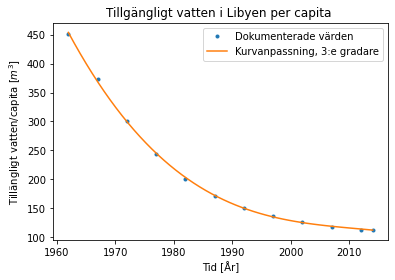

In [47]:
plt.plot(x_ar2_l, vatten_tillgang_l, ".", label="Dokumenterade värden")
plt.plot(x_2_l, funklist_2_l,label="Kurvanpassning, 3:e gradare" )
plt.title('Tillgängligt vatten i Libyen per capita ')
plt.ylabel("Tillängligt vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()


## WEI-index

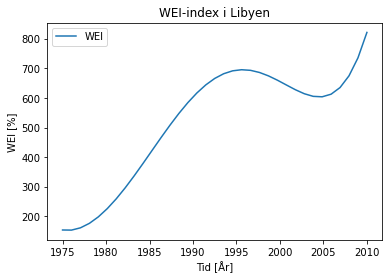

In [48]:
wei= funklist_l/funklist_2_l[13:-4]
weiprocent= wei*100
plt.plot(x_1_l, weiprocent, label="WEI")
plt.title('WEI-index i Libyen')
plt.ylabel("WEI [%]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()